# Assignment 2

In [46]:
using StatsBase                                                                 #importing relevant libraries
using Distributions
using StatsPlots

## First Question $ Bern(\frac{c_{y}p_{y}}{c_{x}p_{x}+c_{y}p_{y}}) $ event

Probability of getting success(output 1) in first iteration $ = Pr(C_{1}=1,C_{2}=1) $        
$ = Pr(C_{1}=1)*Pr(C_{2}=1) $           
$ = \frac{c_{y}p_{y}}{c_{x}+c_{y}} $          

Probability of getting stuck in loop for one iteration $ = Pr(C_{1}=1,C_{2}=0)+Pr(C_{1}=0,C_{2}=0) $                           
$ = \frac{c_{y}*(1-p_{y})}{c_{x}+c_{y}} + \frac{c_{x}*(1-p_{x})}{c_{x}+c_{y}} $           
$ = 1 - \frac{c_{x}p_{x} + c_{y}p_{y}}{c_{x}+c_{y}} $         

Probability of getting success(output 1) $ = \sum_{j=0}^{+\infty} $ j  iterations*success                
$ = \sum_{j=0}^{+\infty} (1 - \frac{c_{x}p_{x} + c_{y}p_{y}}{c_{x}+c_{y}})^{j}*\frac{c_{y}p_{y}}{c_{x}+c_{y}} $            
$ = \frac{1}{\frac{c_{x}p_{x} + c_{y}p_{y}}{c_{x}+c_{y}}}*\frac{c_{y}p_{y}}{c_{x}+c_{y}}  $    
$ = \frac{c_{y}p_{y}}{c_{x}p_{x}+c_{y}p_{y}} $             

## Second Question of sampling uniformly from a p dimensional sphere

In [47]:
function unipdim(dimp,fin,m)  
   it = 0                                    # fin would be the matrix to store the samples and it would be to store the number of iterations done to get the sample
   for i in 1:m
      check = 0
      while check == 0
          sum = 0
           for j in 1:dimp
              u = rand(Uniform(-1,1))
              fin[i+(j-1)*m] = u
              sum = sum + u*u                                     # for checking whether the point lies inside the sphere or not
           end
           it = it + 1
           if sum < 1
              check = 1                                           # point lies inside the sphere and we can break the loop
           end
      end  
  end
  return it
end

unipdim (generic function with 1 method)

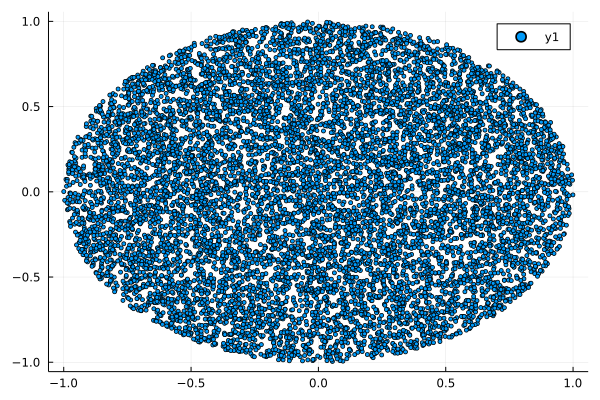

In [48]:
n = Int(1e4)
p = Int(2)
x = fill(0.0, (n,p))
i2 = 0
i2 = unipdim(p,x,n)

plot(x[1:n], x[n+1:n*2], seriestype = :scatter, markersize = 3)

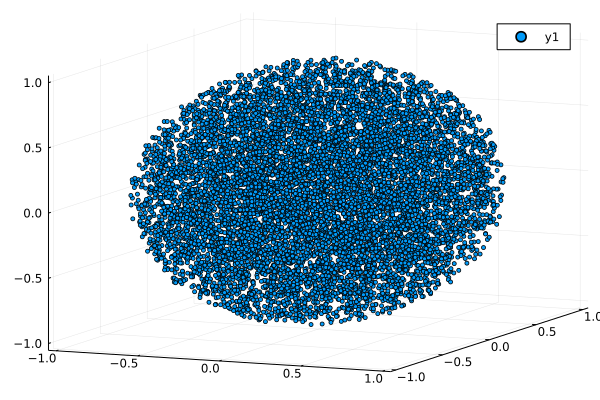

In [49]:
p = Int(3)
x = fill(0.0, (n,p))
i3 = unipdim(p,x,n)
plot(x[1:n], x[n+1:n*2],x[n*2+1:n*3], seriestype = :scatter, markersize = 3)

In [50]:
p = Int(4)
x = fill(0.0, (n,p))
i4 = unipdim(p,x,n)

32466

In [51]:
p = Int(5)
x = fill(0.0, (n,p))
i5 = unipdim(p,x,n)

60324

In [52]:
p = Int(6)
x = fill(0.0, (n,p))
i6 = unipdim(p,x,n)

125158

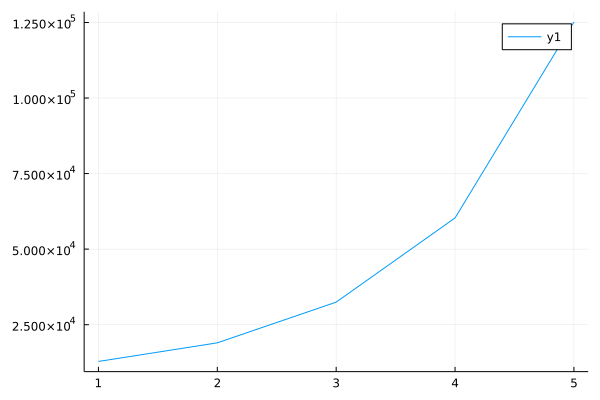

In [53]:
Iterat = [i2,i3,i4,i5,i6]
plot(Iterat)

We see that the number of failures in samples/ iterations of loops for getting the sample increase rapidly on increasing the dimension of the sphere.

## Third Question

c in this case can be easily calculated from the fact that f(x)/g(x) is independent of x where f(x) is truncated normal and g(x) is normal. We could take our c to be slightly larger than f(x)/g(x). This also means that f(x)/c*g(x) is also >1 when x is between -a to a and 0 otherwise. So whenever our sample proposal is between -a and a, that becomes our target sample.                      
for reference to true moments of truncated normal (https://en.wikipedia.org/wiki/Truncated_normal_distribution#Two_sided_truncation[2])

In [54]:
function sample_trunc(a)                          
    x = rand(Normal())
    while ( x<-a || x>a)                             # drawing from normal and checking whether it also lies in truncated normal
        x = rand(Normal())
    end
    return x
end

sample_trunc (generic function with 1 method)

In [55]:
samp4 = fill(0.0,(1,n))
for j in 1:n
    samp4[j] = sample_trunc(4)
end
mean(samp4)              # True mean is 0

0.006345213365296751

In [56]:
var(samp4)             # True variance is  approximately 1

0.9842398972220568

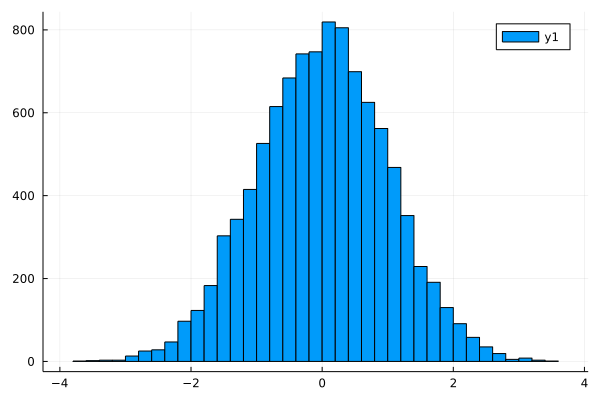

In [57]:
plot(histogram(vec(samp4)))

In [58]:
samp1 = fill(0.0,(1,n))
for j in 1:n
    samp1[j] = sample_trunc(1)
end
mean(samp1)                      # True mean is 0

0.010449273825523374

In [59]:
var(samp1)                      # True Variance is approximately 0.3  

0.29010168928934066

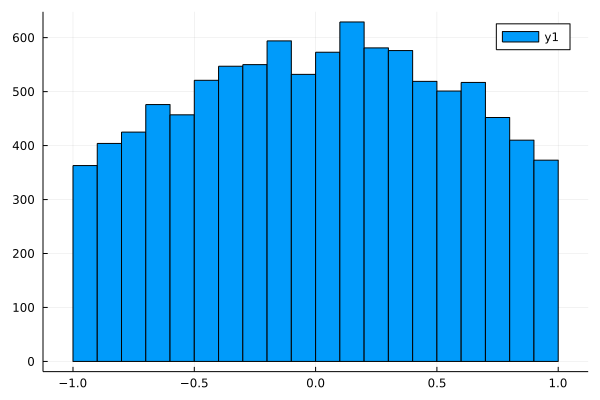

In [60]:
plot(histogram(vec(samp1)))

We notice that the variance when a = 1 is very less compared to when a = 4.

Lavesh Mangal                                
200546